In [2]:
import numpy as np
import pandas as pd
import spacy
import json 
import statistics
import nltk
import os
import spacy
import seaborn
from spacy.lang.en import English
from nltk.tokenize import sent_tokenize, word_tokenize
import spacy.displacy as displacy
import ast 
import gensim.downloader as api
import operator
import keras.backend as K
import matplotlib.pyplot as plt
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [118]:
sciecedf = pd.read_csv('/content/drive/MyDrive/text_mining_project/naturalscience/attempt2.csv')


# to create a dataframe which contains only blog posts pertaining discussions about biology
Biology_df = sciecedf[sciecedf['Topic'] == 'Biology'] 
# to create a dataframe which contains only blog posts pertaining discussions about physics
Physics_df = sciecedf[sciecedf['Topic'] == 'Physics'] 
# to create a dataframe which contains only blog posts pertaining discussions about chemistry
Chemistry_df = sciecedf[sciecedf['Topic'] == 'Chemistry'] 
Chemistry_df.head( )

,Unnamed: 0,Id,Comment,Topic,cleaned_Comments
4,4,0xbba,Cesium is such a pretty metal.,Chemistry,pretty metal
5,5,0xb39,I meant that the question itself is unclear.,Chemistry,I meant question unclear
7,7,0x531,"??? I mean it has some butter, but besides tha...",Chemistry,I mean butter besides sugar baking soda
10,10,0xc19,Is H2S what produced when the egg protein is ...,Chemistry,produced egg protein titration basic solution ...
13,13,0xf83,Has this helped you with the 4.8% value tho?,Chemistry,value tho


In [8]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp("Ada Lovelace was born in London")

# Document level
ents = [(e.text, e.label_, e.kb_id_) for e in doc.ents]



[('Ada Lovelace', 'PERSON', ''), ('London', 'GPE', '')]

In [125]:
class EntityLinking:
  def __init__(self, input_df): 
    self.df = input_df
    # to create a dictionary for storage of entities 
    self.entity_dict = {}
    self.entity_dict_count = {}
    self.label_entity_dict = {}

  def samla_data(self): 
    '''
    input: the input dataframe 
    output: a dictionary, which stores the entities and the number of times
            an entity appeared in the text chunks
    '''
    nlp = spacy.load("en_core_web_sm")
    sentencelist = self.df['cleaned_Comments'].tolist() 
    for sent in sentencelist: 
      doc = nlp(str(sent)) 
      for ent in doc.ents: 
        if (ent.text, ent.label_) not in self.entity_dict:
          self.entity_dict[(ent.text, ent.label_)] =  1
        if (ent.text, ent.label_) in self.entity_dict:
          self.entity_dict[(ent.text, ent.label_)] += 1 
        if ent.label_ not in self.entity_dict_count: 
          self.entity_dict_count[ent.label_] = [ent.text] 
        else: 
          self.entity_dict_count[ent.label_].append(ent.text) 

  def store_entity_data(self): 
    '''
    input: the dictionary, which was created in the last function
    output: a pie diagram 
    '''
    dict1 = {} 
    for k, v in self.entity_dict.items(): 
      if k[1] not in dict1: 
        dict1[k[1]] =1
      else:
        dict1[k[1]] +=1 
    # to count on the number of entities appeared in the text 
    entity_labels = [ ]
    entity_data = [ ]
    explode = [ ] 
    for k, v in dict1.items(): 
      entity_labels.append(k)
      entity_data.append(v)
      explode.append(0.1)
    # to create a pie diagram 
    plt.figure(figsize=(15, 15)) 
    # Seaborn colour palette  
    palette_color = seaborn.color_palette("ch:s=.25,rot=-.25")   
    plt.pie(entity_data, labels=entity_labels, colors=palette_color,
        explode=explode, autopct='%.0f%%')
  def bardiagram(self, entity_label, threshold): 

    newdict = { }
    for k,v in self.entity_dict.items(): 
      if k[1] == entity_label:
        if v > threshold:
          newdict[k] = v

    self.newlist2 = sorted(newdict.items(), key=operator.itemgetter(1), reverse=True)

    entries = [ ]
    values = [ ] 
    for element in self.newlist2:
      entries.append(str(element[0])) 
      values.append(element[1]) 
    #print(entries)
    #print(values)
    palette_color = seaborn.color_palette("terrain_r") 
    # to construct a bar diagram: 
    plt.figure(figsize=(20, 15))  
    seaborn.barplot(x=values, y=entries, palette="Blues_d")
    plt.grid()
    




      

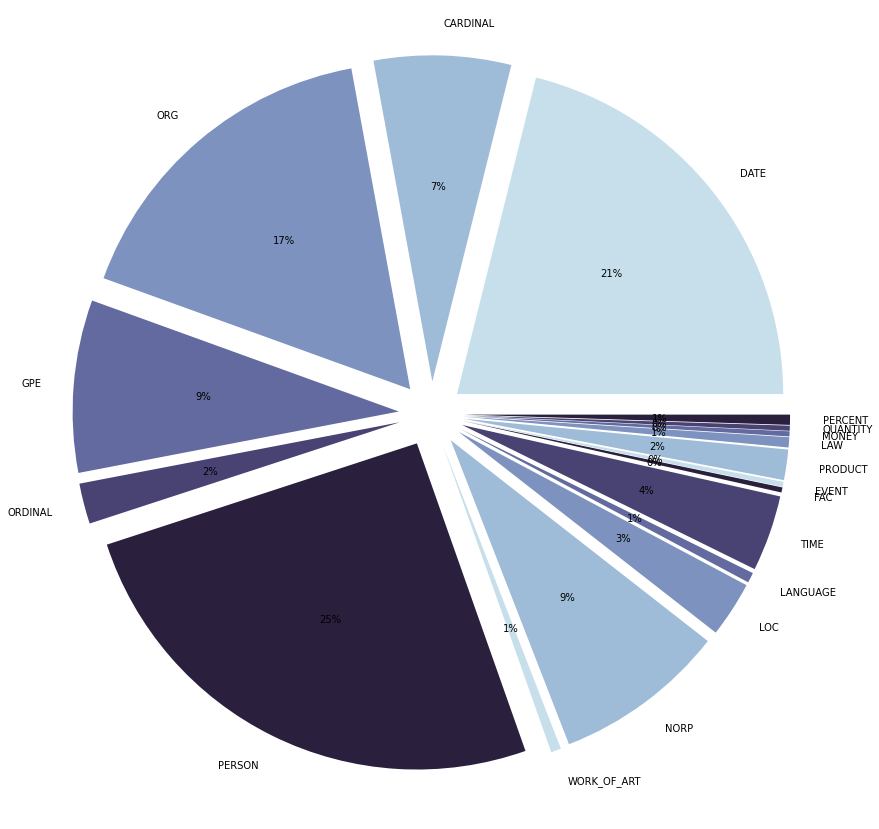

In [126]:
model1 = EntityLinking(Biology_df)
model1.samla_data( )
model1.store_entity_data()

Text(0.5, 1.0, 'Ordinals, amongst blog posts about biology')

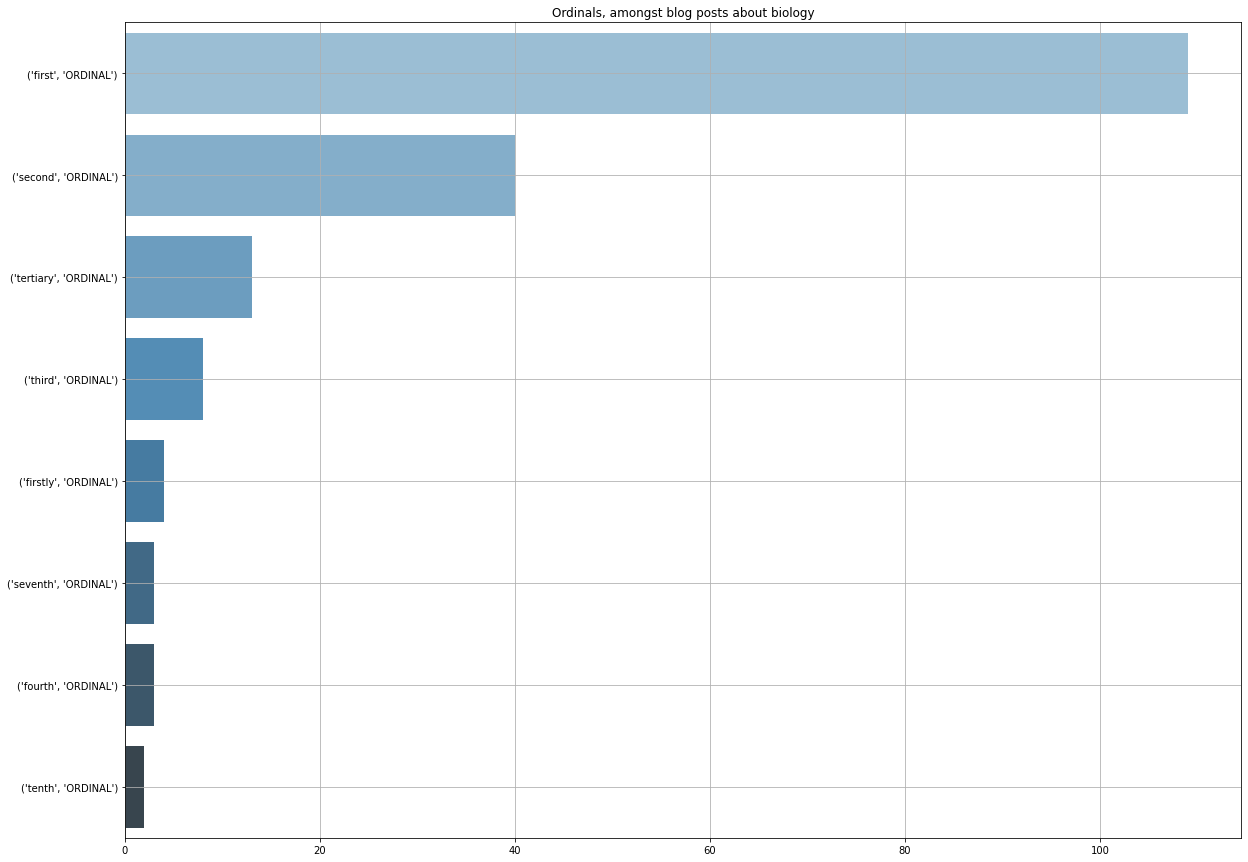

In [140]:
model1.bardiagram('ORDINAL', 1)
plt.title('Ordinals, amongst blog posts about biology')

Text(0.5, 1.0, 'People, amongst blog posts about biology')

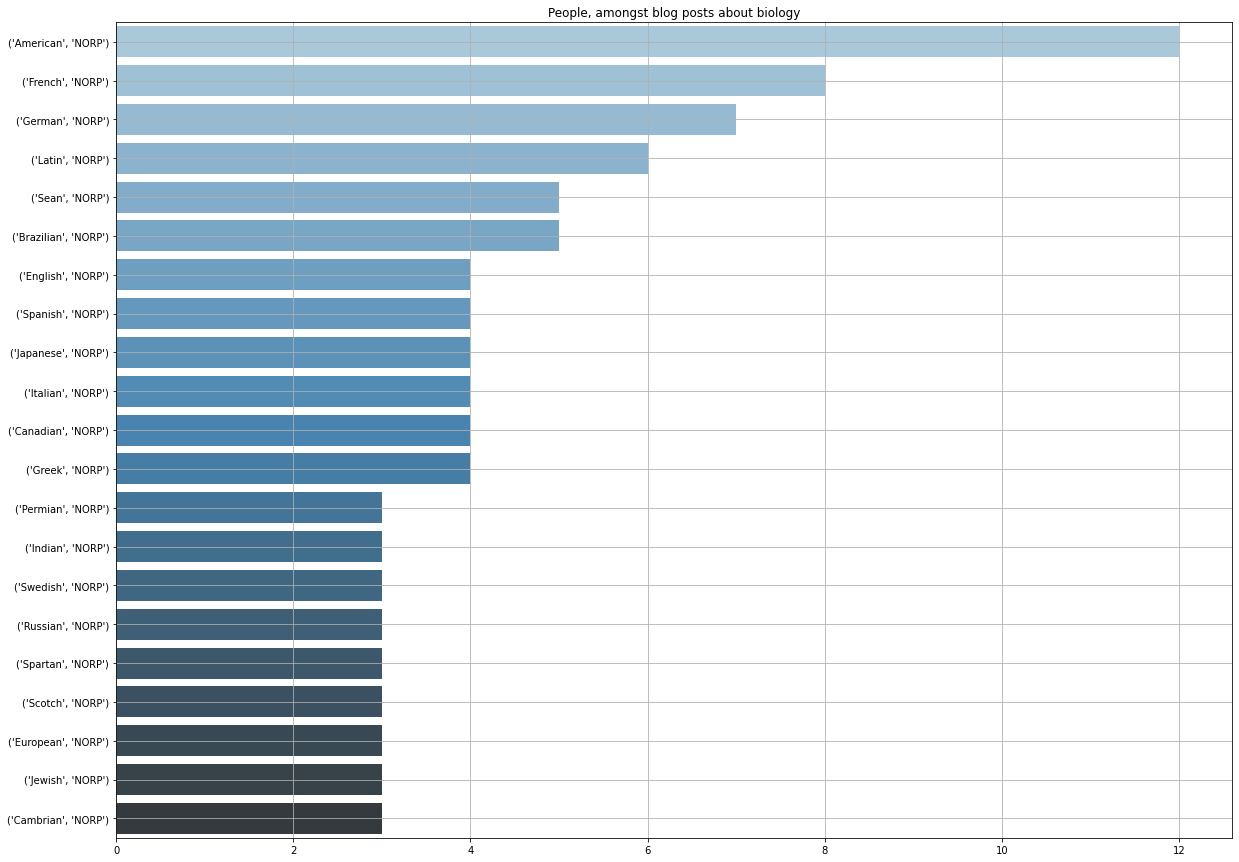

In [135]:
model1.bardiagram('NORP', 2)
plt.title('Nationalities, amongst blog posts about biology')

Text(0.5, 1.0, 'People, amongst blog posts about biology')

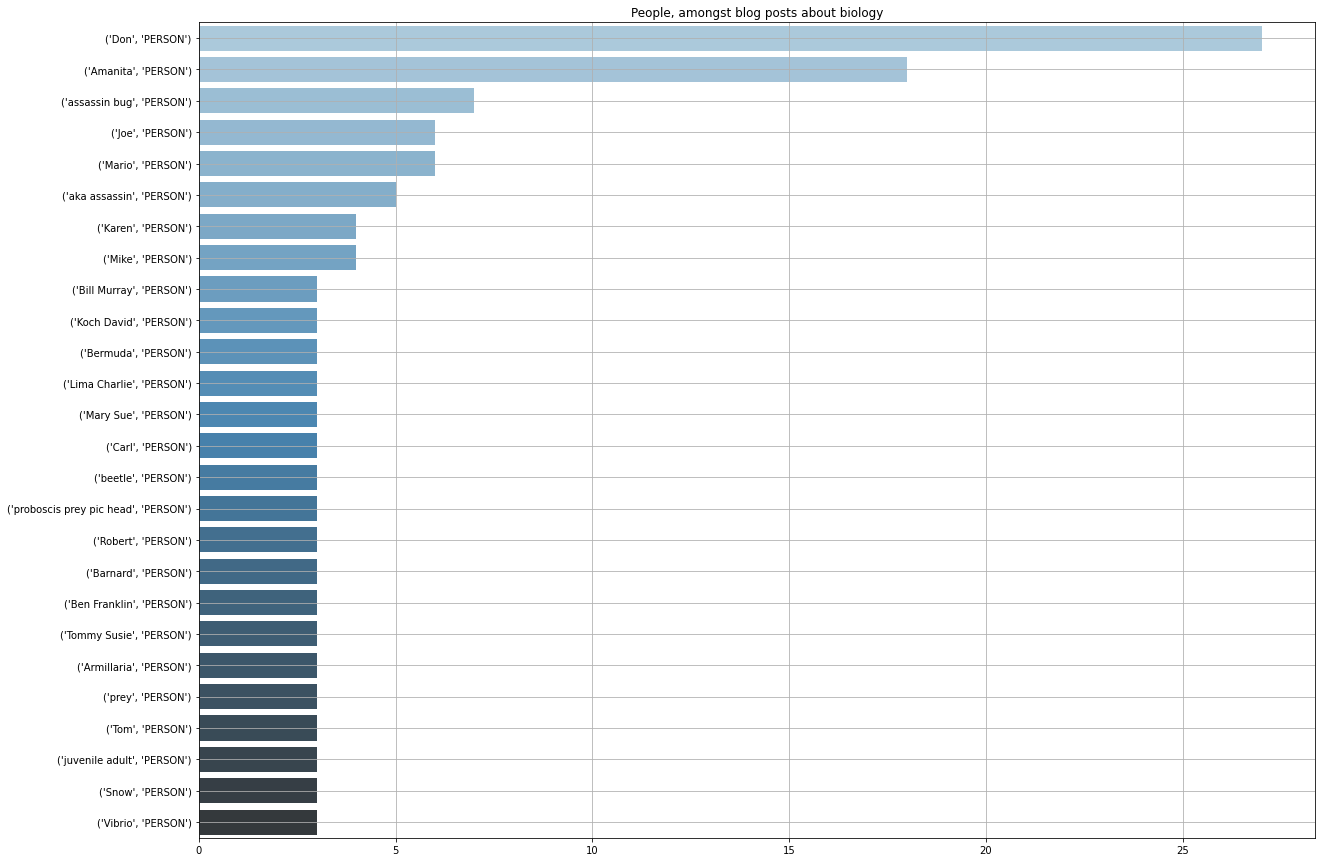

In [134]:
model1.bardiagram('PERSON', 2)
plt.title('People, amongst blog posts about biology')

Text(0.5, 1.0, 'Names of places, amongst blog posts about biology')

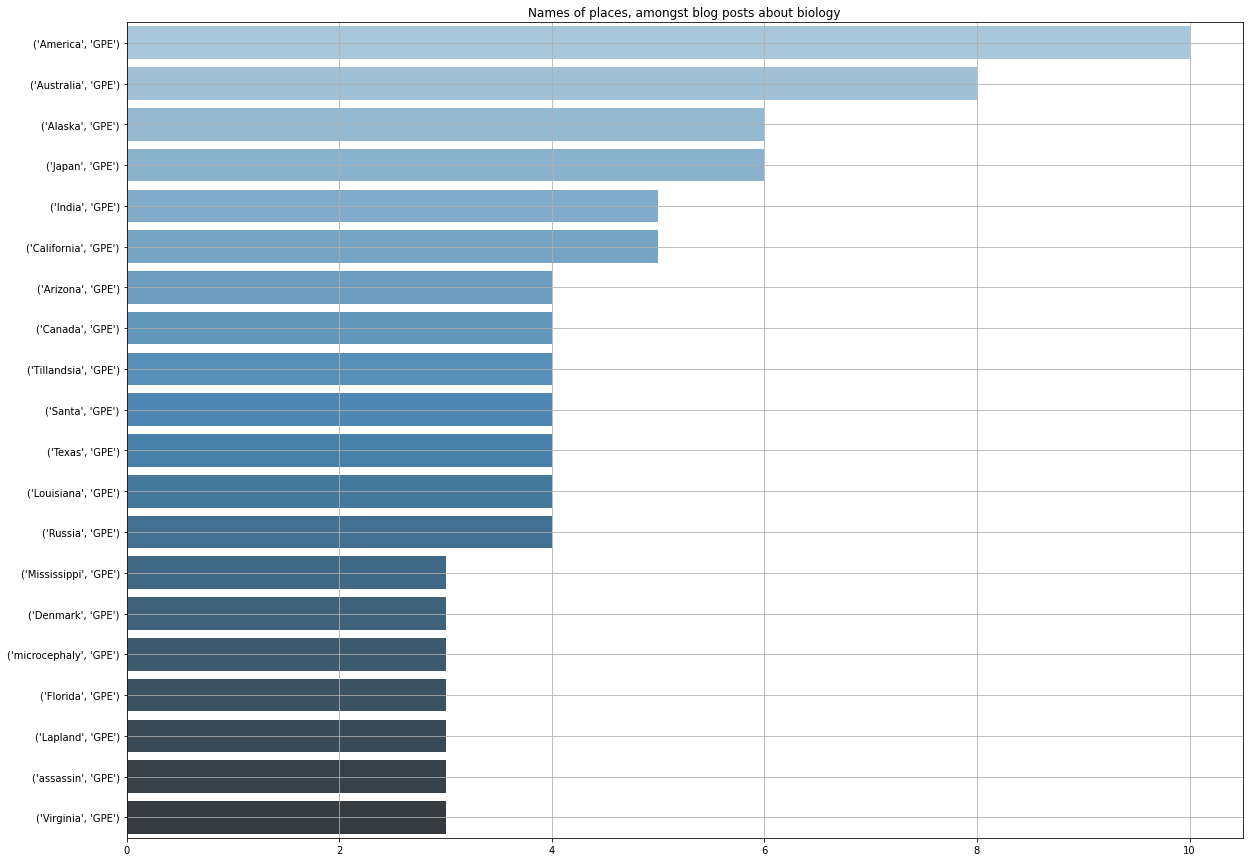

In [127]:
model1.bardiagram('GPE', 2)
plt.title('Names of places, amongst blog posts about biology')

Text(0.5, 1.0, 'Geographical locations, amongst blog posts about biology')

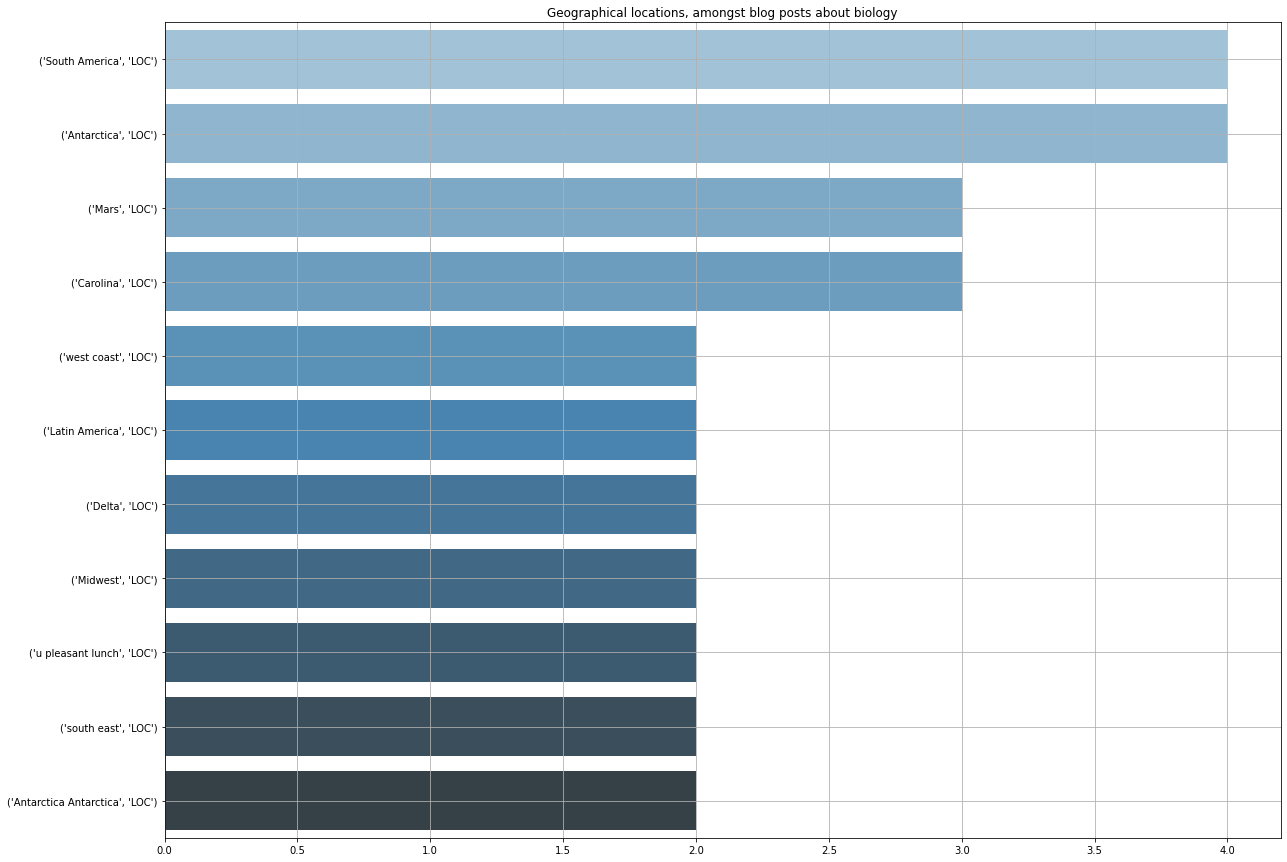

In [129]:
model1.bardiagram('LOC', 0)
plt.title('Geographical locations, amongst blog posts about biology')

Text(0.5, 1.0, 'Institutions, brands and more, amongst blog posts about biology')

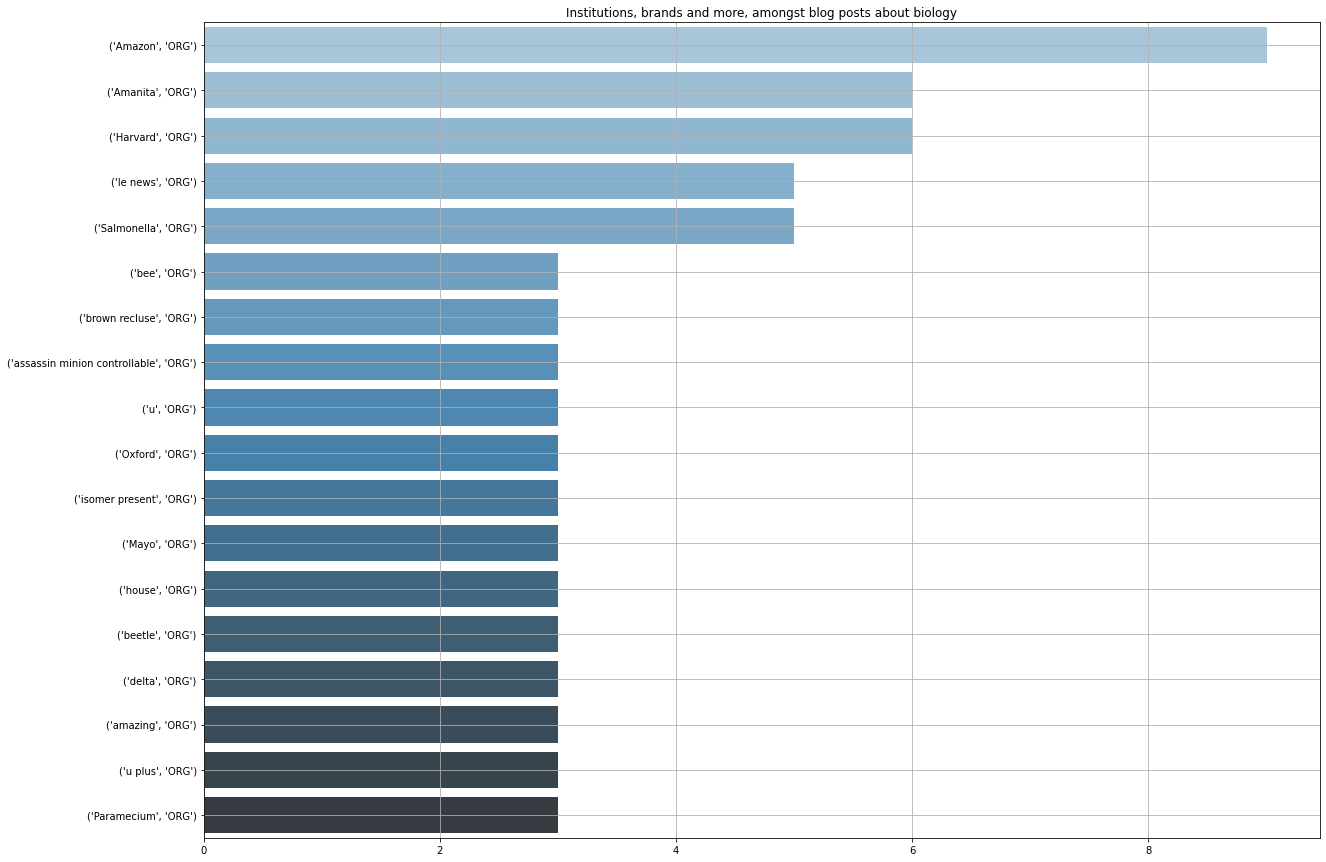

In [139]:
model1.bardiagram('ORG', 2)
plt.title('Institutions, brands and more, amongst blog posts about biology')

Text(0.5, 1.0, 'Denotations of time, amongst blog posts about biology')

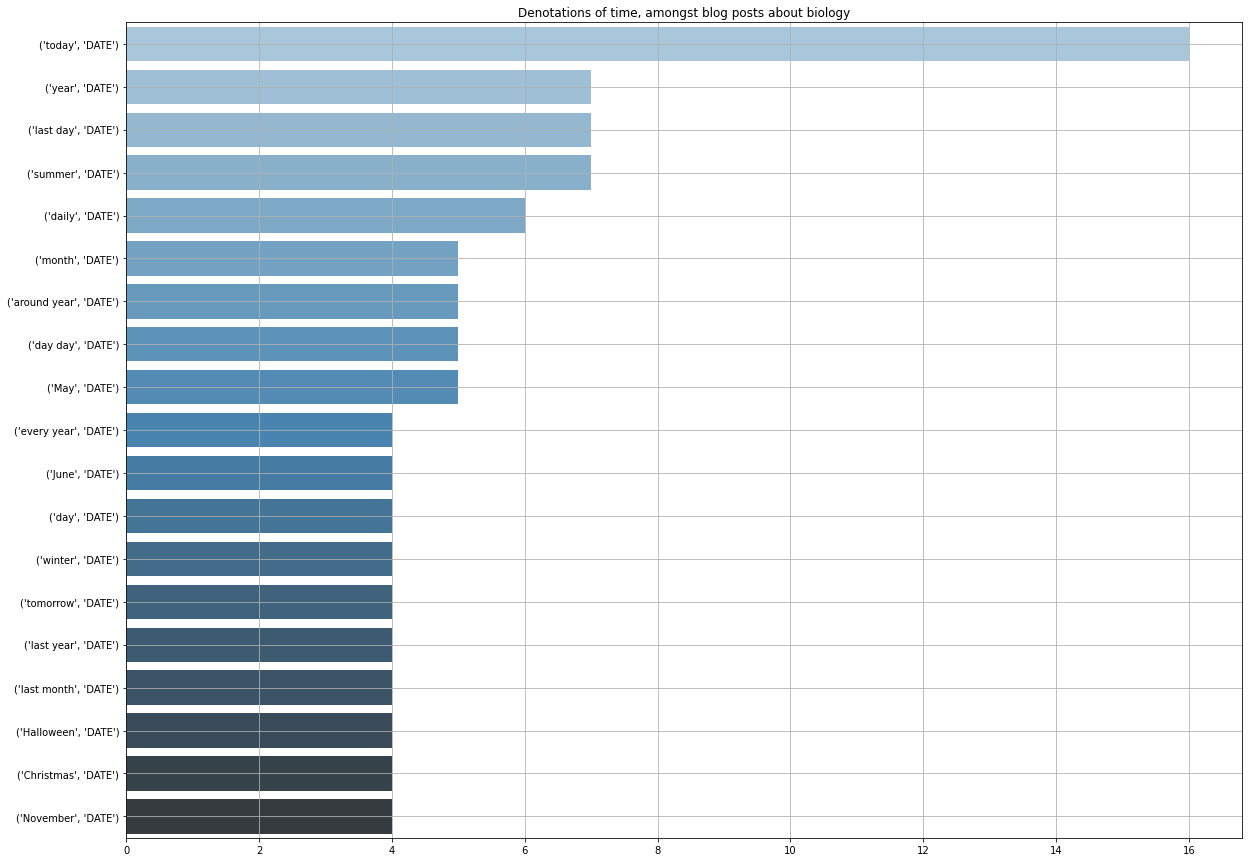

In [133]:
model1.bardiagram('DATE', 3)
plt.title('Denotations of time, amongst blog posts about biology')

Text(0.5, 1.0, 'Word of art, amongst blog posts about biology')

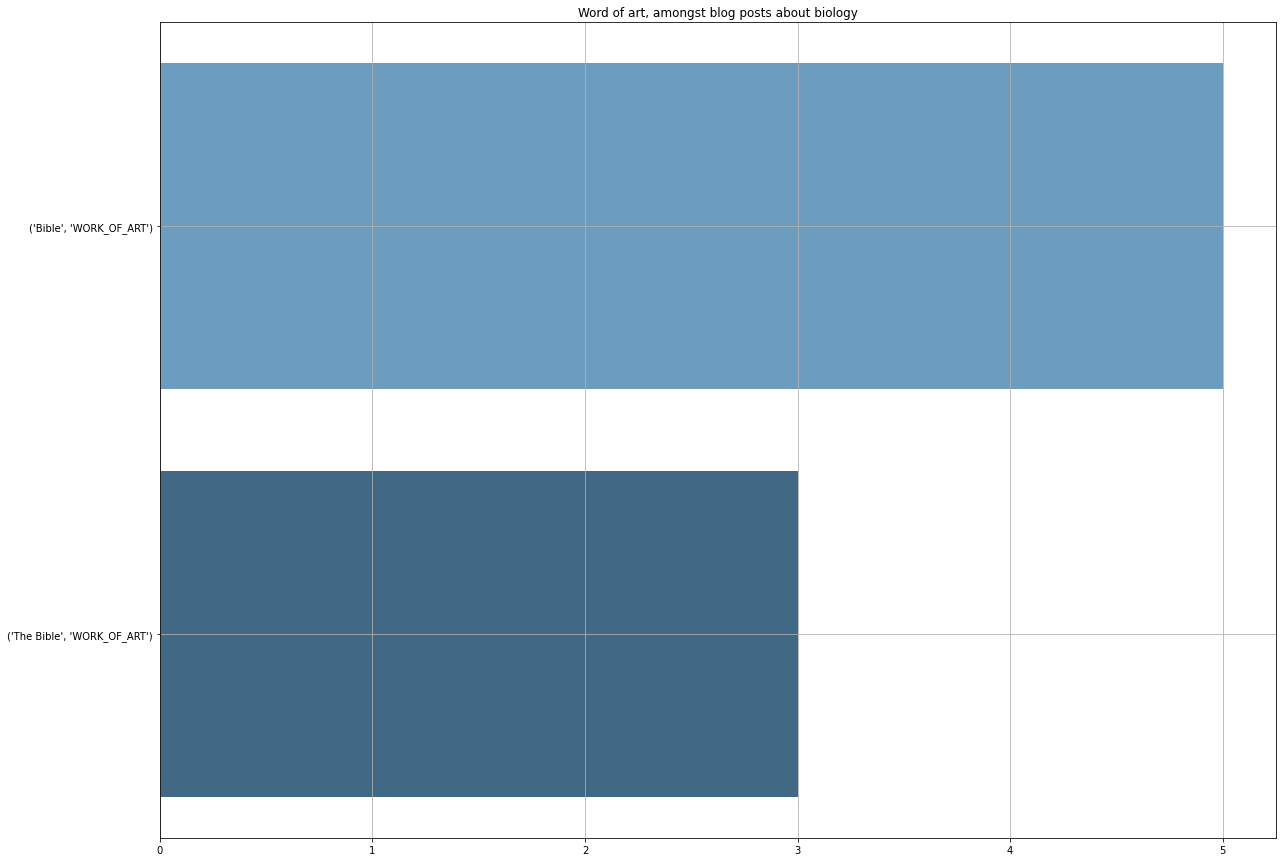

In [141]:
model1.bardiagram('WORK_OF_ART', 0)
plt.title('Word of art, amongst blog posts about biology')

In [31]:
dict1 = {}
for k,v in model1.entity_dict.items( ):
  if k[1] not in dict1: 
    dict1[k[1]] =1
  else:
    dict1[k[1]] +=1

  
dict1

{'CARDINAL': 183,
 'DATE': 294,
 'EVENT': 3,
 'FAC': 5,
 'GPE': 160,
 'LANGUAGE': 2,
 'LAW': 3,
 'LOC': 35,
 'MONEY': 29,
 'NORP': 76,
 'ORDINAL': 20,
 'ORG': 458,
 'PERCENT': 55,
 'PERSON': 294,
 'PRODUCT': 26,
 'QUANTITY': 33,
 'TIME': 44,
 'WORK_OF_ART': 26}